In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

Import the libraries to use Data Analysis

In [3]:
dataSet = sns.load_dataset("mpg")

Calling the dataset from using the seaborn library

### Checking Dataset

- "mpg" (miles per gallon): Represents the fuel efficiency of the automobile, indicating how many miles it can travel per gallon of gasoline. 

- "cylinders": Indicates the number of cylinders in the automobile's engine.

- "displacement": Represents the engine displacement of the automobile, which refers to the total volume swept by all the cylinders in the engine.

- "horsepower": Measure of the power of an engnine.

- "weight": Represents the weight of the automobile, indicating the total weight of the vehicle.

- "acceleration": It indicates the time taken for the vehicle to reach 0 to 60 miles per hour.

- "model_year": Represents the model year of the automobile. 

- "origin": Represents the country of origin for the automobile. 

- "name": Represents the model name of the automobile. 

In [4]:
dataSet.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
dataSet.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [6]:
dataSet["model_year"] = dataSet["model_year"] + 1900 # to get logical graphs

In [7]:
dataSet.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

In [8]:
dataSet.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

There are no missing values in the dataset

In [9]:
dataSet.duplicated().sum()

0

There are no duplicate row

In [10]:
dataSet.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,1976.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,1973.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,1976.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,1979.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000


# Data Visualization

In [11]:
# Get the numeric features to another dataset:
dataSetNumeric = dataSet.iloc[:,0:7]

weight         -0.831741
displacement   -0.804203
horsepower     -0.778427
cylinders      -0.775396
acceleration    0.420289
model_year      0.579267
mpg             1.000000
Name: mpg, dtype: float64


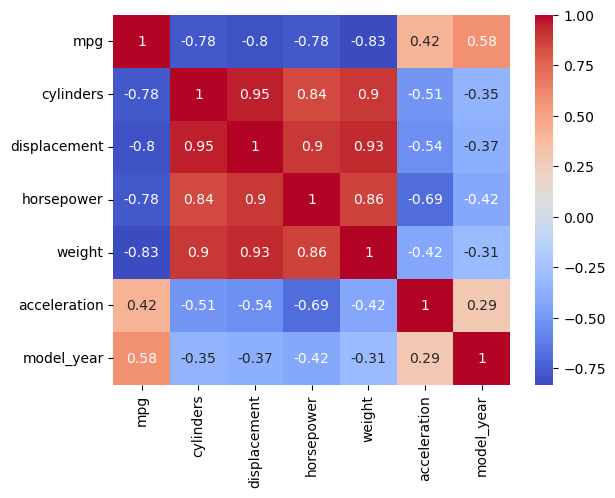

In [12]:
corr = dataSetNumeric.corr()
sns.heatmap(corr, annot = True, cmap="coolwarm")
print(dataSetNumeric.corr()["mpg"].sort_values())

### Histograms

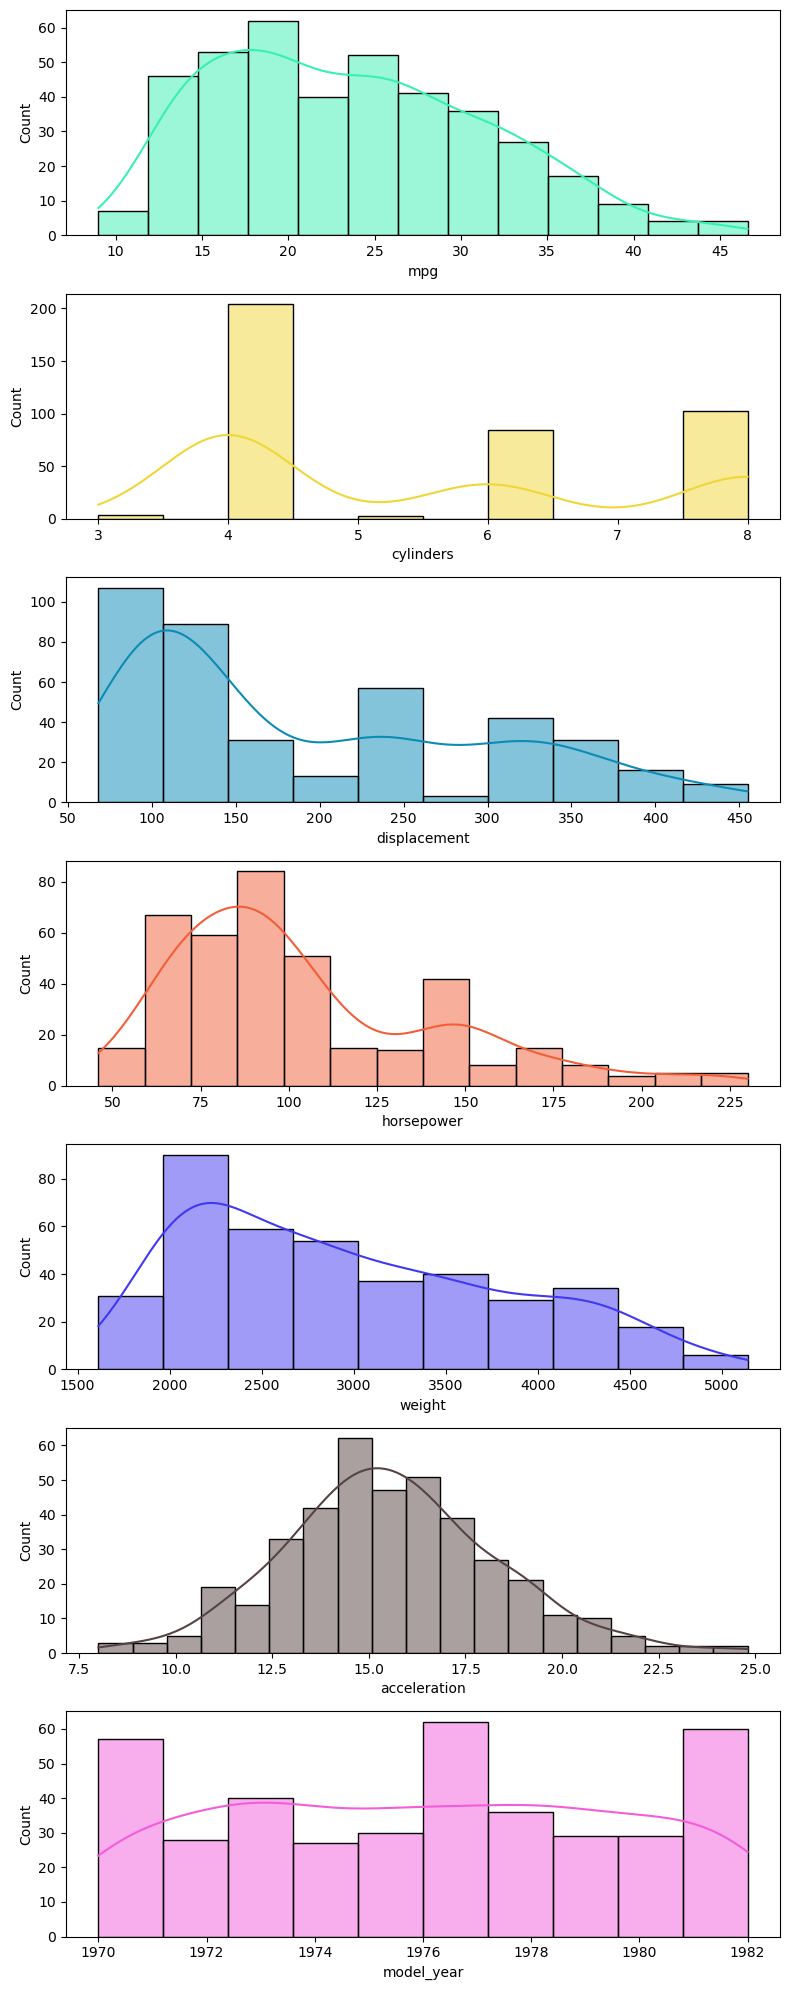

In [41]:
fig, axs = plt.subplots(7, 1, figsize=(8, 20)) 

sns.histplot(data=dataSet, x=dataSet.iloc[:,0], kde = True, color="#38F1B1", ax=axs[0])
sns.histplot(data=dataSet, x=dataSet.iloc[:,1], kde = True, color="#F1D638", ax=axs[1])
sns.histplot(data=dataSet, x=dataSet.iloc[:,2], kde = True, color="#0B8BB6", ax=axs[2])
sns.histplot(data=dataSet, x=dataSet.iloc[:,3], kde = True, color="#F15E38", ax=axs[3])
sns.histplot(data=dataSet, x=dataSet.iloc[:,4], kde = True, color="#4138F1", ax=axs[4])
sns.histplot(data=dataSet, x=dataSet.iloc[:,5], kde = True, color="#564343", ax=axs[5])
sns.histplot(data=dataSet, x=dataSet.iloc[:,6], kde = True, color="#F35DDA", ax=axs[6])

plt.tight_layout() 

### Pie Chart

In [15]:
europeOrigin = dataSet[dataSet["origin"] == "europe"]
japanOrigin = dataSet[dataSet["origin"] == "japan"]
usaOrigin = dataSet[dataSet["origin"] == "usa"]

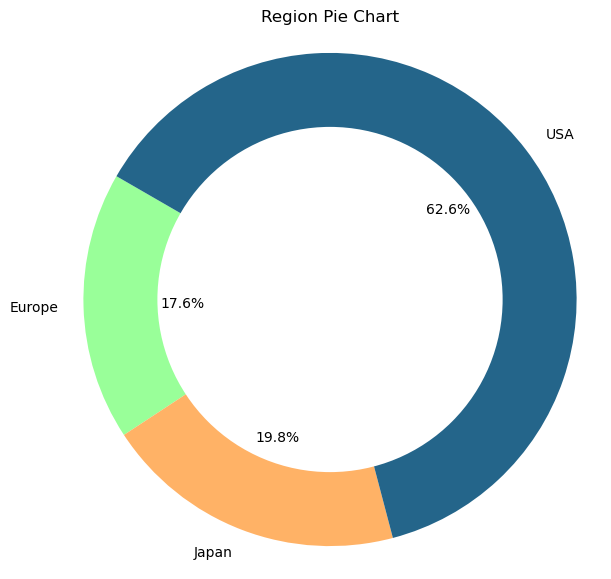

#Europe: 70
#Japan: 79
#USA: 249 


In [16]:
labels = ["Europe", "Japan", "USA"]
sizes = [europeOrigin.shape[0], japanOrigin.shape[0], usaOrigin.shape[0]]
colors = ["#99FF99","#FFB266", "#24658A"]

plt.figure(figsize = (7,7))
plt.pie(sizes, labels = labels, colors = colors, autopct = "%1.1f%%", startangle = 150)

centerCircle = plt.Circle((0,0), 0.7, fc = "white")
fig = plt.gcf()
fig.gca().add_artist(centerCircle)

plt.axis("equal")
plt.title("Region Pie Chart")
plt.show()

print(f"#Europe: {europeOrigin.shape[0]}\n#Japan: {japanOrigin.shape[0]}\n#USA: {usaOrigin.shape[0]} ")

As can be understood from the extracted pie chart, the number of vehicles originating from the USA is significantly higher than the number of vehicles originating from Europe and Japan.

### Origin-based comparison

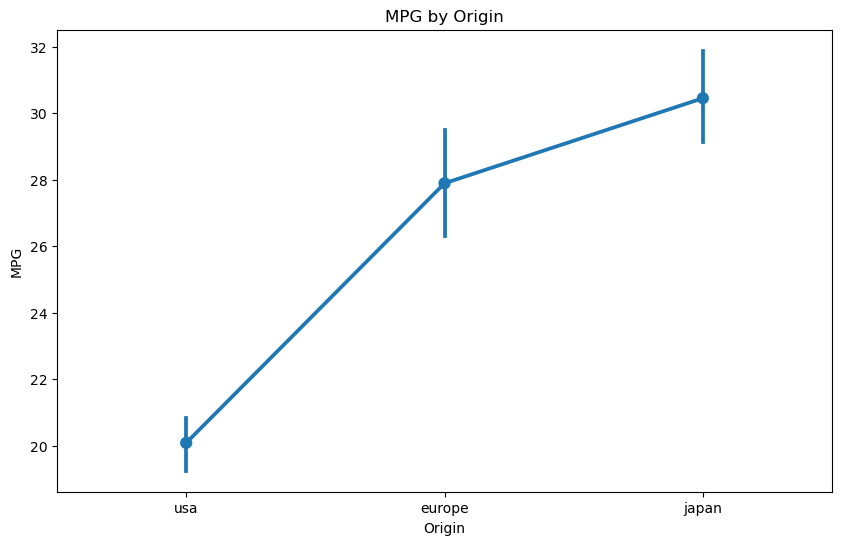

In [17]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='origin', y='mpg', data=pd.concat([usaOrigin, europeOrigin, japanOrigin]))
plt.title("MPG by Origin")
plt.xlabel("Origin")
plt.ylabel("MPG")
plt.show()

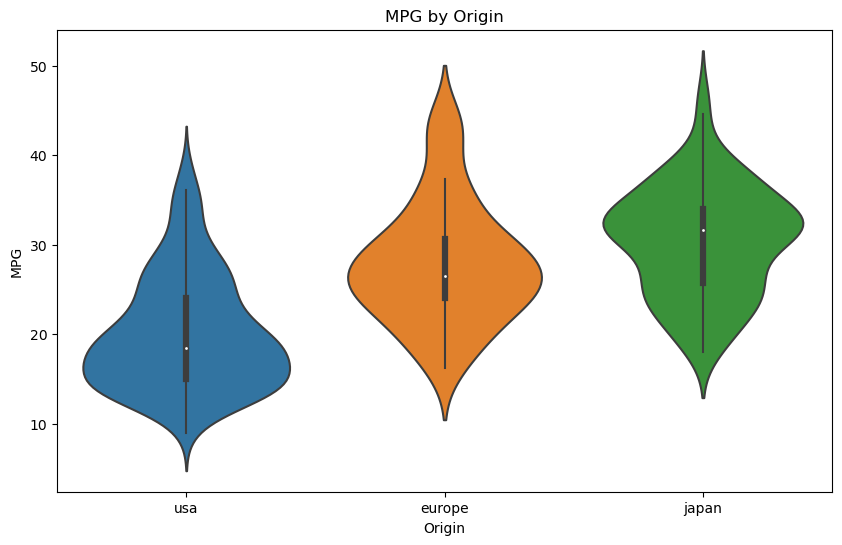

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='origin', y='mpg', data=pd.concat([usaOrigin, europeOrigin, japanOrigin]))
plt.title("MPG by Origin")
plt.xlabel("Origin")
plt.ylabel("MPG")
plt.show()

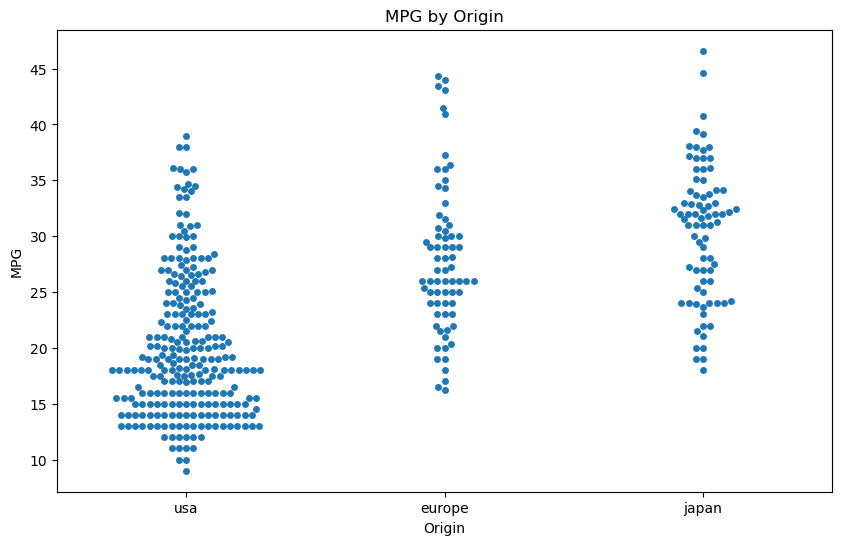

In [19]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='origin', y='mpg', data=pd.concat([usaOrigin, europeOrigin, japanOrigin]))
plt.title("MPG by Origin")
plt.xlabel("Origin")
plt.ylabel("MPG")
plt.show()

### Boxplots

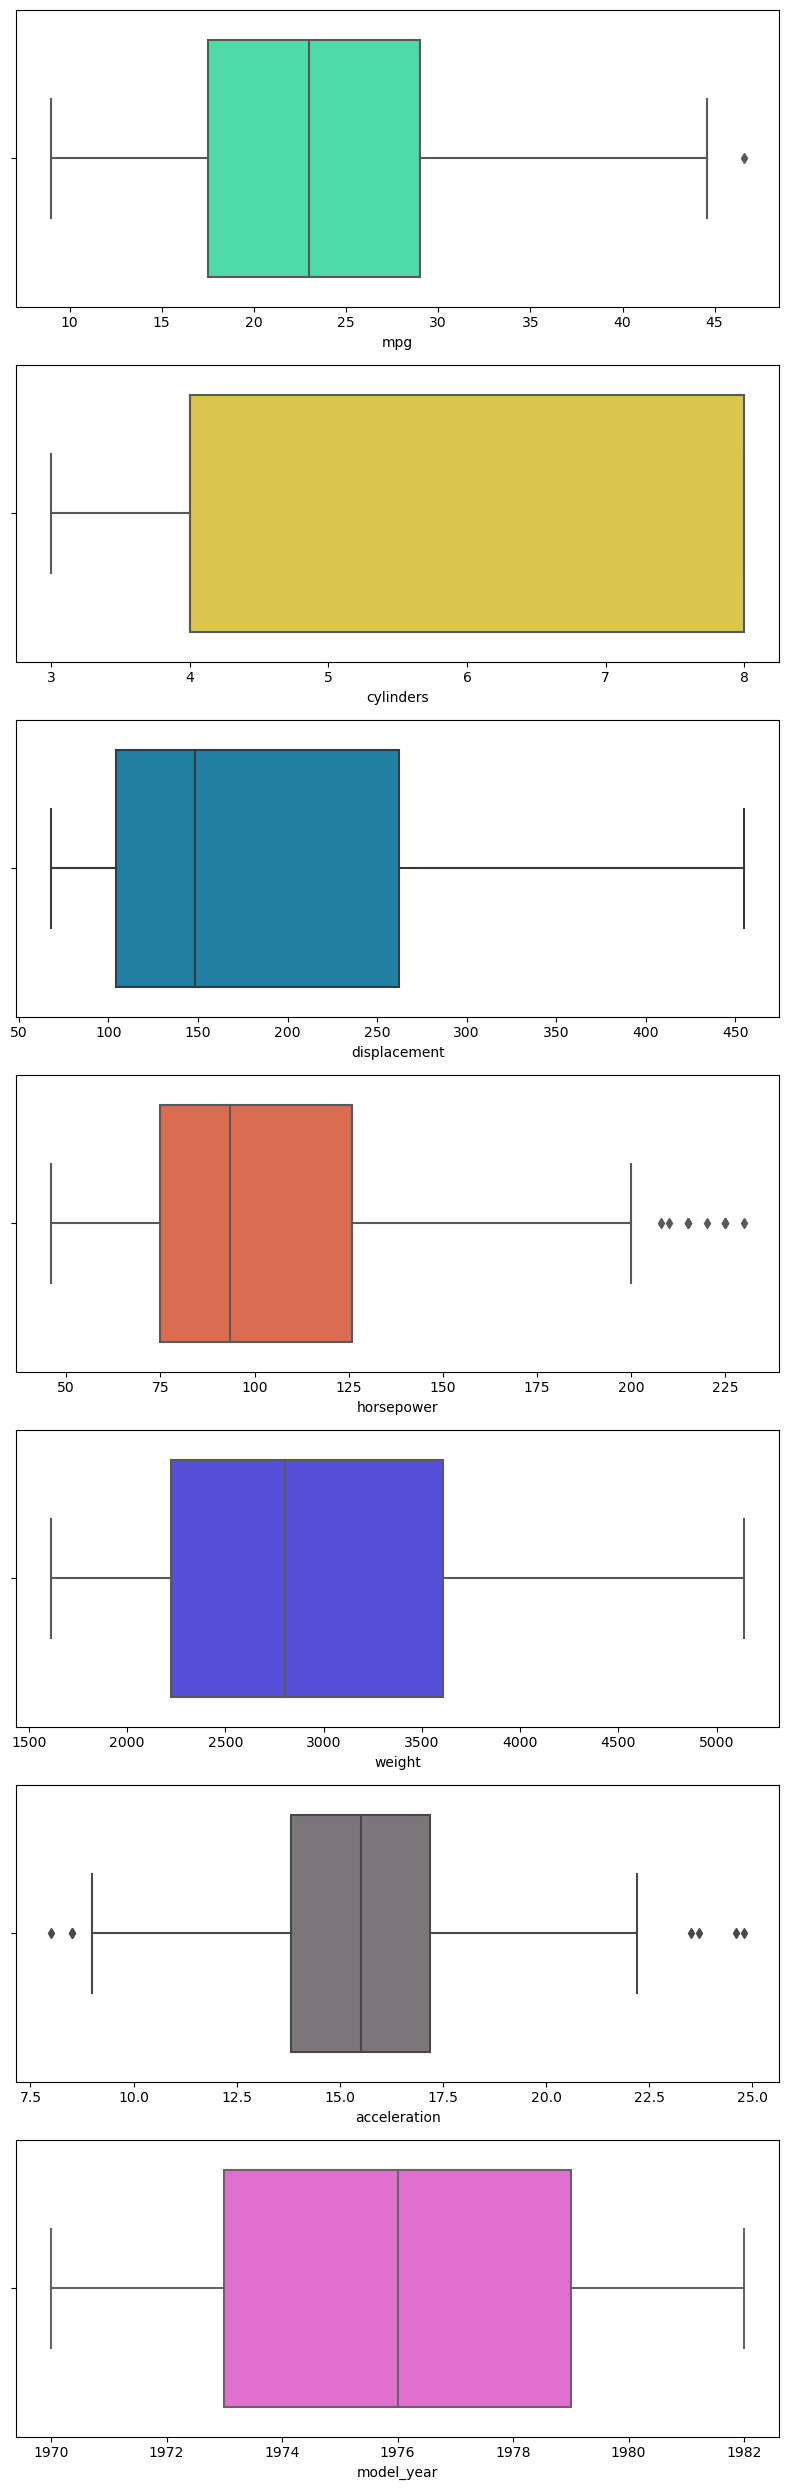

In [43]:
fig, axs = plt.subplots(7, 1, figsize=(8, 25))  

sns.boxplot(data=dataSet, x=dataSet.iloc[:,0], color="#38F1B1", ax=axs[0])
sns.boxplot(data=dataSet, x=dataSet.iloc[:,1], color="#F1D638", ax=axs[1])
sns.boxplot(data=dataSet, x=dataSet.iloc[:,2], color="#0B8BB6", ax=axs[2])
sns.boxplot(data=dataSet, x=dataSet.iloc[:,3], color="#F15E38", ax=axs[3])
sns.boxplot(data=dataSet, x=dataSet.iloc[:,4], color="#4138F1", ax=axs[4])
sns.boxplot(data=dataSet, x=dataSet.iloc[:,5], color="#7D747B", ax=axs[5])
sns.boxplot(data=dataSet, x=dataSet.iloc[:,6], color="#F35DDA", ax=axs[6])

plt.tight_layout()

Horsepower, acceleration and mpg has some outliers. They can take off from dataset.

### Analysis With the Years

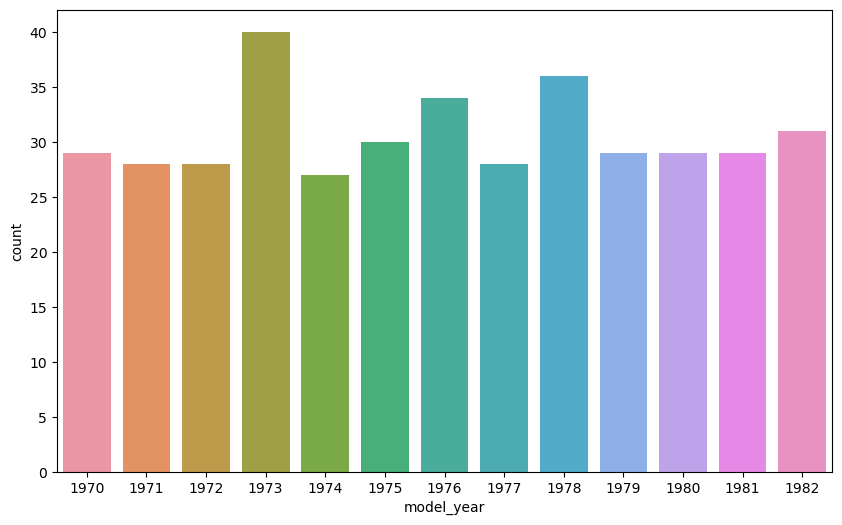

Year: 1970, Number of cars:29
Year: 1971, Number of cars:28
Year: 1972, Number of cars:28
Year: 1973, Number of cars:40
Year: 1974, Number of cars:27
Year: 1975, Number of cars:30
Year: 1976, Number of cars:34
Year: 1977, Number of cars:28
Year: 1978, Number of cars:36
Year: 1979, Number of cars:29
Year: 1980, Number of cars:29
Year: 1981, Number of cars:29
Year: 1982, Number of cars:31


In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x="model_year", data = dataSet)
plt.show() # The graph being positioned above the print

counts = dataSet["model_year"].value_counts()

for year, count in dataSet["model_year"].value_counts().sort_index().items():
    print(f"Year: {year}, Number of cars:{count}")

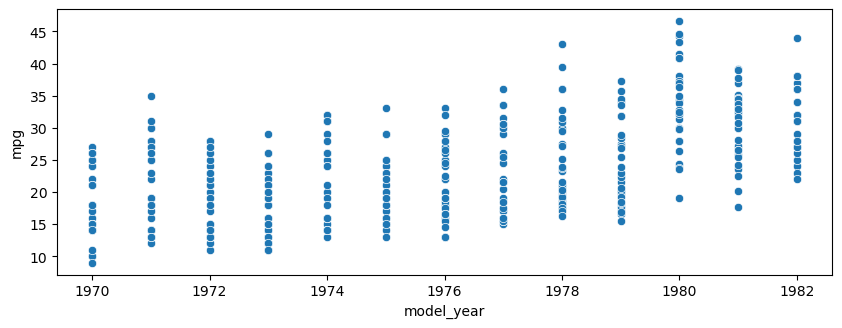

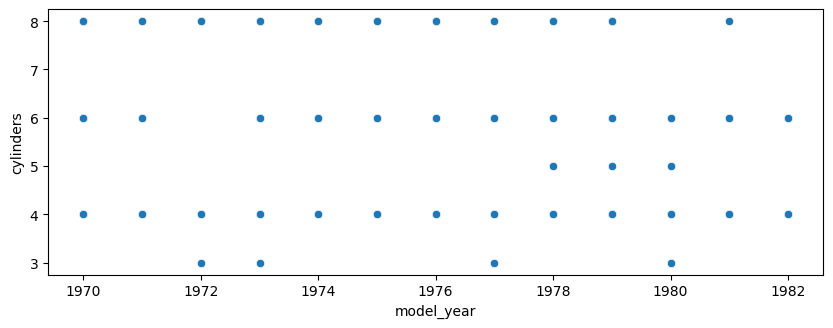

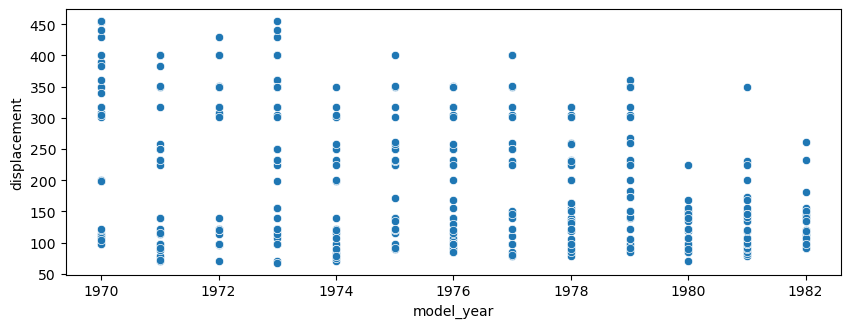

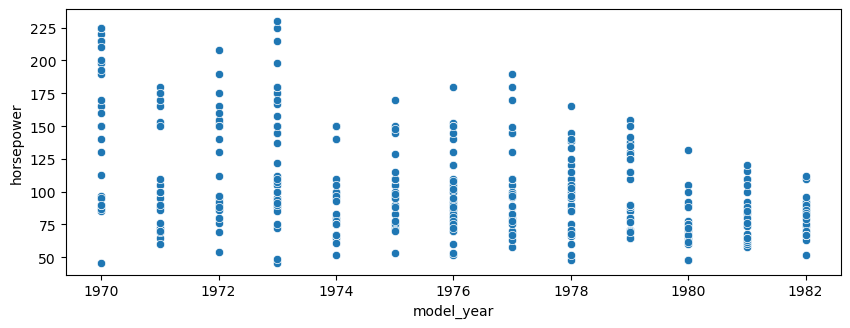

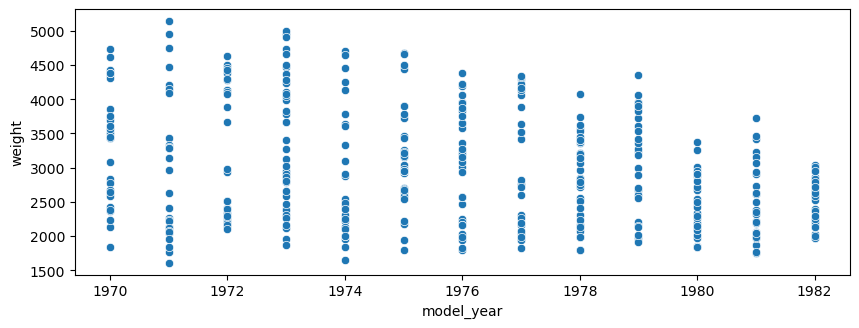

In [22]:
featureCount1 = 1

while featureCount1 <= 5:
    
    plt.figure(figsize=(10, 20))
    
    plt.subplot(5,1,featureCount1)
    
    sns.scatterplot(x="model_year", y = dataSet.iloc[:,featureCount1-1], data = dataSet)
    
    featureCount1 += 1

Over the years, it has been observed that mpg (miles per gallon) has increased, indicating a decrease in fuel consumption. Additionally, it can be seen that engine displacement, horsepower, and weight have decreased over the years. Furthermore, there were no 8-cylinder vehicles produced in 1982 and 1979, and no 6-cylinder vehicles produced in 1972.

### Analysis With the MPG

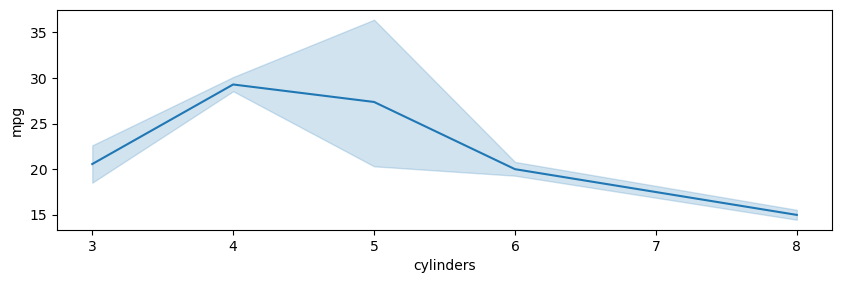

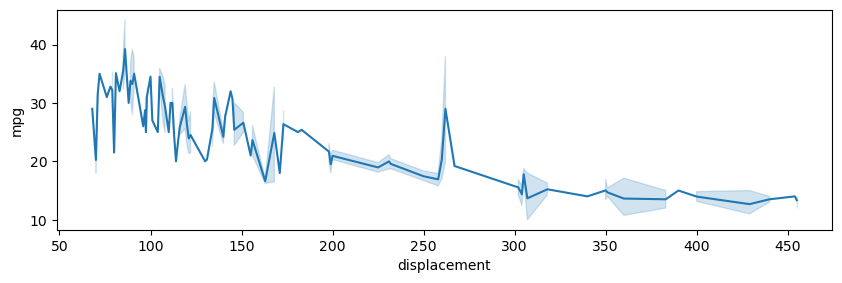

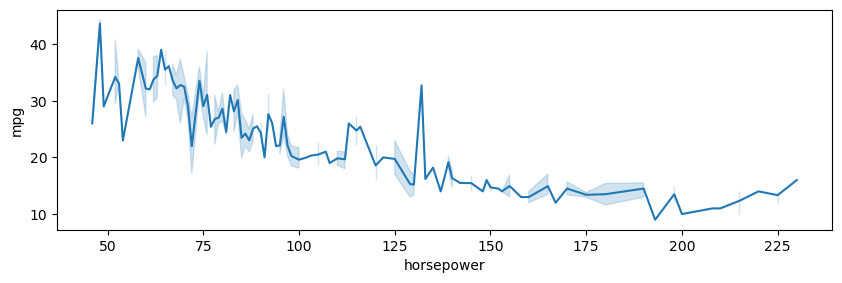

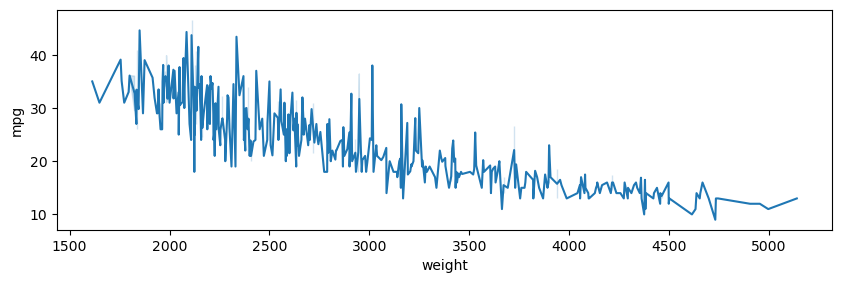

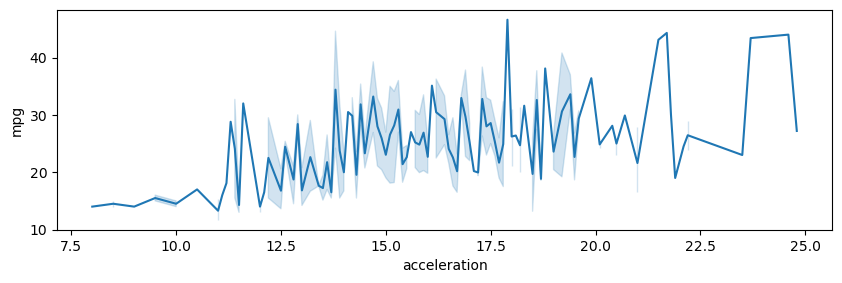

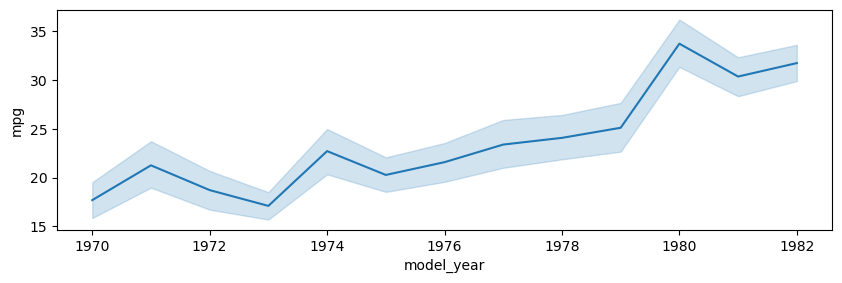

In [23]:
feature = 1
while feature <= 6:
    
    plt.figure(figsize=(10, 20))
    
    plt.subplot(6,1,feature)
    
    sns.lineplot(x=dataSet.iloc[:,feature], y="mpg", data=dataSet)
    
    feature += 1

There is a clear negative correlation between mpg and cylinders, displacement, horsepower, and weight. We had also seen this in the correlation check.